# **Implementasi Reduksi Dimensi SVD dan Fuzzy C-Means untuk Clustering Data**

Nama : Isnita Widyur Rahmah
NIM : 220411100048
Kelas : IF 7A

Link Project : https://github.com/nittyaa99/ppw

## Install Library

In [14]:
!pip install scikit-fuzzy

## Import Library

In [15]:
import numpy as np
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from skfuzzy.cluster import cmeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Load Data

In [16]:
file_path = "berita_vsm.csv"
data = pd.read_csv(file_path)

data

,Kategori,abroad,absolut,acara,achmad,acu,adab,adam,adaptif,adb,...,yoppy,yuan,yudha,yuran,yusuf,zayana,zona,zonasi,zulhas,zulkifli
0,Ekonomi,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
1,Ekonomi,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.055924,0.0,0.0
2,Ekonomi,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.044704,0.000000,0.0,0.0
3,Ekonomi,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.052317,0.000000,0.000000,0.0,0.000000,0.084570,0.000000,0.0,0.0
4,Ekonomi,0.0,0.054469,0.0,0.0,0.0,0.0,0.054469,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Olahraga,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.062649,0.0,0.000000,0.000000,0.000000,0.0,0.0
96,Olahraga,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.040965,0.000000,0.0,0.081929,0.000000,0.000000,0.0,0.0
97,Olahraga,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
98,Olahraga,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0


## Memisahkan Label dan Fitur

In [17]:
labels = data['Kategori']
features = data.drop('Kategori', axis=1).values

## Mengubah Label menjadi Numerik menggunakan Label Encoding

In [18]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

## Clustering dengan SVD dan Fuzzy C-Means
Fuzzy C-Means (FCM) adalah metode clustering yang memperbolehkan sebuah data menjadi anggota lebih dari satu cluster dengan derajat keanggotaan tertentu (bukan hanya keanggotaan keras seperti pada K-Means).
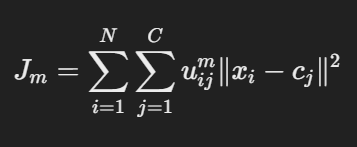
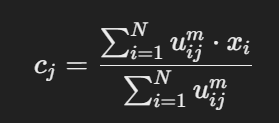
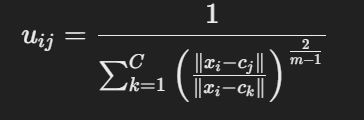

In [19]:
results = {}

# Mulai dari jumlah fitur penuh hingga 2 dimensi
for dim in range(features.shape[1], 1, -1):
    # Kurangi dimensi data
    svd = TruncatedSVD(n_components=dim)
    reduced_features = svd.fit_transform(features)

    # Fuzzy C-Means Clustering
    cntr, u, u0, d, jm, p, fpc = cmeans(
        data=reduced_features.T,
        c=2,                  # 2 clusters
        m=2.0,                # Tingkat fuzziness
        error=0.005,          # Toleransi error
        maxiter=1000          # Iterasi maksimum
    )

    # Keanggotaan cluster
    cluster_membership = np.argmax(u, axis=0)

    # Hitung akurasi berdasarkan label asli
    accuracy = max(
        accuracy_score(encoded_labels, cluster_membership),
        accuracy_score(encoded_labels, 1 - cluster_membership)  # Cek inversi cluster
    )

    # Simpan hasil
    results[dim] = {
        'svd_features': reduced_features,
        'centroids': cntr,
        'membership': cluster_membership,
        'accuracy': accuracy
    }

## Menentukan Dimensi dengan Akurasi Terbaik

In [20]:
best_dim = max(results, key=lambda dim: results[dim]['accuracy'])
best_accuracy = results[best_dim]['accuracy']

print(f"Akurasi terbaik: {best_accuracy:.2f} pada dimensi {best_dim}.")

Akurasi terbaik: 0.97 pada dimensi 1875.


## Scatter Plot untuk Dimensi Terbaik

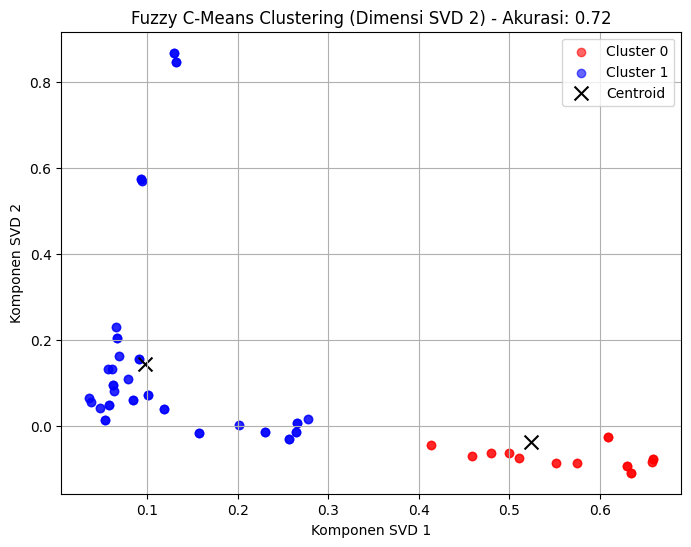

In [26]:
final_result = results[2]
svd_features = final_result['svd_features']
centroids = final_result['centroids']
membership = final_result['membership']
accuracy = final_result['accuracy']

# Scatter Plot
plt.figure(figsize=(8, 6))
colors = ['red', 'blue']
for i in range(2):  # Untuk 2 cluster
    cluster_points = svd_features[membership == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i}', alpha=0.6)

# Tambahkan centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroid')
plt.title(f"Fuzzy C-Means Clustering (Dimensi SVD 2) - Akurasi: {accuracy:.2f}")
plt.xlabel("Komponen SVD 1")
plt.ylabel("Komponen SVD 2")
plt.legend()
plt.grid()
plt.show()

## Menampilkan Akurasi per Dimensi

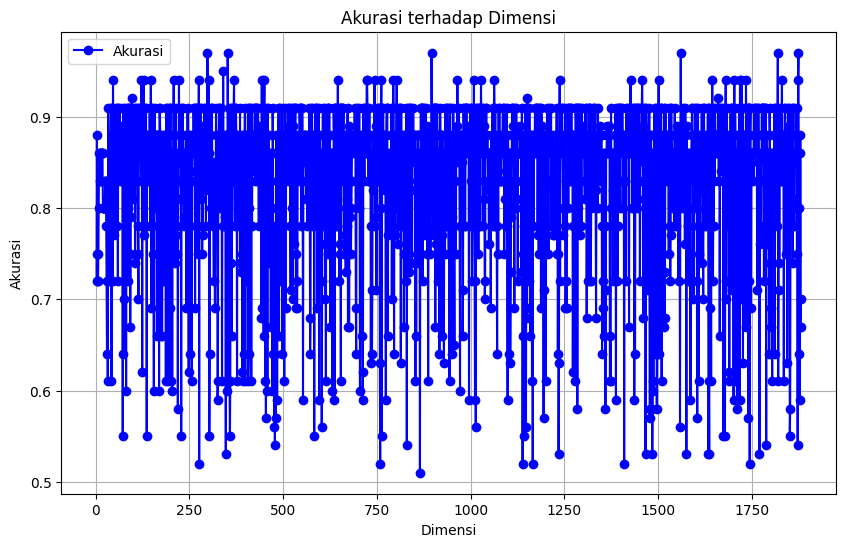

Dimensi dengan akurasi terbaik: 1875
Akurasi terbaik: 0.97


In [28]:
accuracies = [result['accuracy'] for result in results.values()]
dimensions = list(results.keys())

# Plot akurasi terhadap dimensi
plt.figure(figsize=(10, 6))
plt.plot(dimensions, accuracies, marker='o', color='b', linestyle='-', label="Akurasi")
plt.xlabel('Dimensi')
plt.ylabel('Akurasi')
plt.title('Akurasi terhadap Dimensi')
plt.grid(True)
plt.legend()
plt.show()

# 6. Menampilkan dimensi dan akurasi terbaik
print(f"Dimensi dengan akurasi terbaik: {best_dim}")
print(f"Akurasi terbaik: {best_accuracy:.2f}")

## Akurasi tiap Dimensi

In [23]:
for dim, result in results.items():
    print(f"Dimensi: {dim}, Akurasi: {result['accuracy']:.2f}")

Dimensi: 1882, Akurasi: 0.70
Dimensi: 1881, Akurasi: 0.67
Dimensi: 1880, Akurasi: 0.88
Dimensi: 1879, Akurasi: 0.59
Dimensi: 1878, Akurasi: 0.86
Dimensi: 1877, Akurasi: 0.64
Dimensi: 1876, Akurasi: 0.80
Dimensi: 1875, Akurasi: 0.97
Dimensi: 1874, Akurasi: 0.94
Dimensi: 1873, Akurasi: 0.54
Dimensi: 1872, Akurasi: 0.80
Dimensi: 1871, Akurasi: 0.75
Dimensi: 1870, Akurasi: 0.91
Dimensi: 1869, Akurasi: 0.86
Dimensi: 1868, Akurasi: 0.86
Dimensi: 1867, Akurasi: 0.86
Dimensi: 1866, Akurasi: 0.86
Dimensi: 1865, Akurasi: 0.86
Dimensi: 1864, Akurasi: 0.78
Dimensi: 1863, Akurasi: 0.81
Dimensi: 1862, Akurasi: 0.91
Dimensi: 1861, Akurasi: 0.91
Dimensi: 1860, Akurasi: 0.74
Dimensi: 1859, Akurasi: 0.88
Dimensi: 1858, Akurasi: 0.88
Dimensi: 1857, Akurasi: 0.91
Dimensi: 1856, Akurasi: 0.88
Dimensi: 1855, Akurasi: 0.86
Dimensi: 1854, Akurasi: 0.86
Dimensi: 1853, Akurasi: 0.58
Dimensi: 1852, Akurasi: 0.55
Dimensi: 1851, Akurasi: 0.91
Dimensi: 1850, Akurasi: 0.89
Dimensi: 1849, Akurasi: 0.86
Dimensi: 1848,